## 12. Time Series and Causality  

This is by far my favorite sort of analysis given how complicated and misunderstood the body of knowledge is.

In [1]:
# Change the Directory
import os
os.chdir("C:\\Users\\datam\\OneDrive\\Desktop\\python") # change as needed

# Verify the change
os.getcwd()

'C:\\Users\\datam\\OneDrive\\Desktop\\python'

In [14]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from pyinform import transfer_entropy
from pmdarima import auto_arima
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error
# Set random seed for reproducibility
np.random.seed(1966)

### AR1 and MA1 Simulations

Simulate AR(1) and MA(1) processes and plot ACF/PACF, as per the original R code.

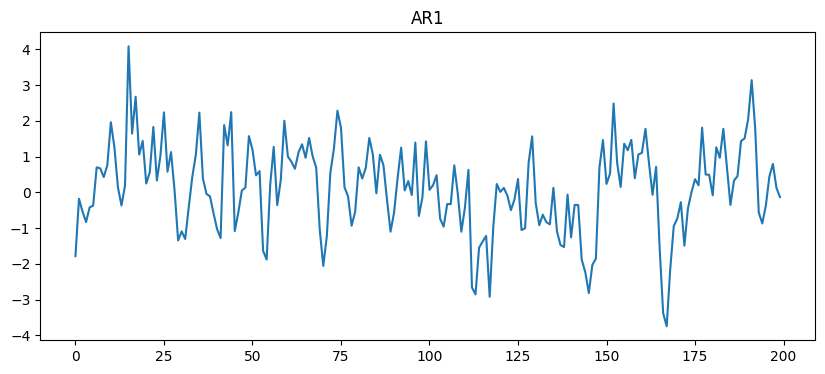

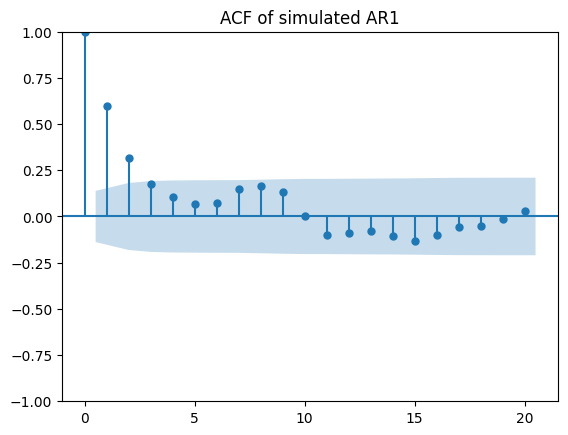

In [3]:
# AR1 simulation: AR(1) with coefficient 0.5
ar1 = ArmaProcess(ar=[1, -0.5], ma=[1]).generate_sample(nsample=200)
plt.figure(figsize=(10, 4))
plt.plot(ar1)
plt.title("AR1")
plt.show()

sm.graphics.tsa.plot_acf(ar1, lags=20)
plt.title("ACF of simulated AR1")
plt.show()

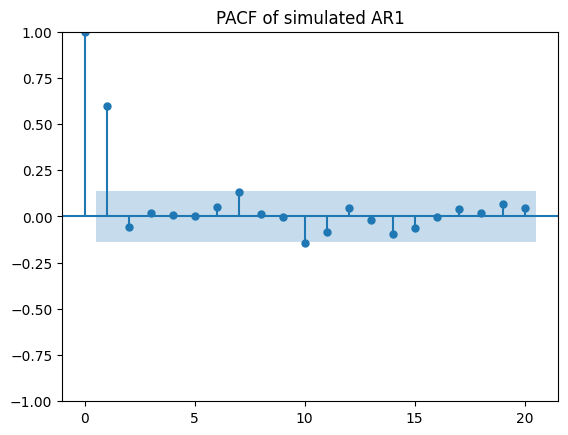

In [4]:
sm.graphics.tsa.plot_pacf(ar1, lags=20)
plt.title("PACF of simulated AR1")
plt.show()

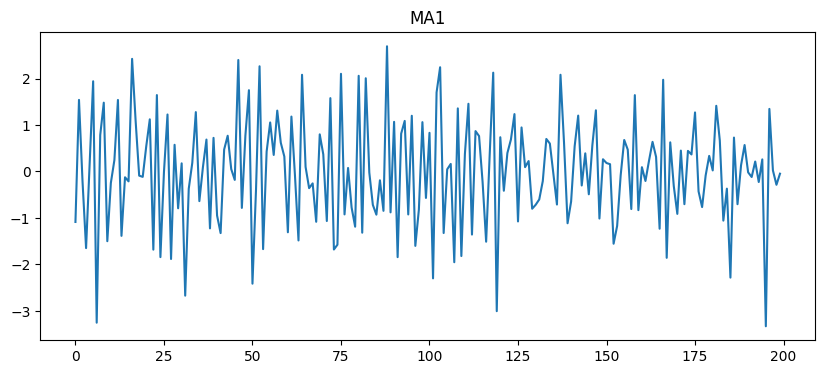

In [5]:
# MA1 simulation: MA(1) with coefficient -0.5
np.random.seed(123)
ma1 = ArmaProcess(ar=[1], ma=[1, -0.5]).generate_sample(nsample=200)
plt.figure(figsize=(10, 4))
plt.plot(ma1)
plt.title("MA1")
plt.show()

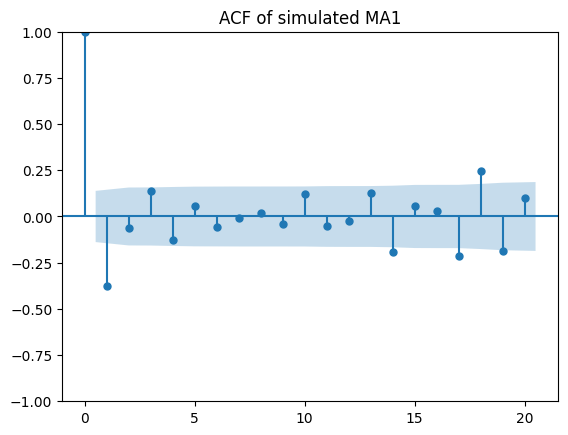

In [8]:
sm.graphics.tsa.plot_acf(ma1, lags=20)
plt.title("ACF of simulated MA1")
plt.show()

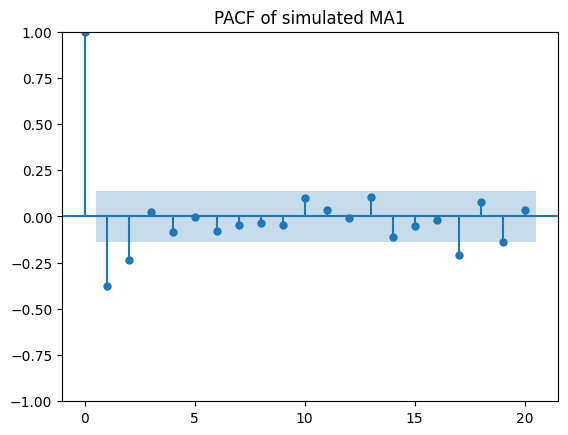

In [9]:
sm.graphics.tsa.plot_pacf(ma1, lags=20)
plt.title("PACF of simulated MA1")
plt.show()

### Climate Data Analysis with ARIMA and ETS

Load `climate.csv` and perform ARIMA and ETS forecasting on the Temp series.

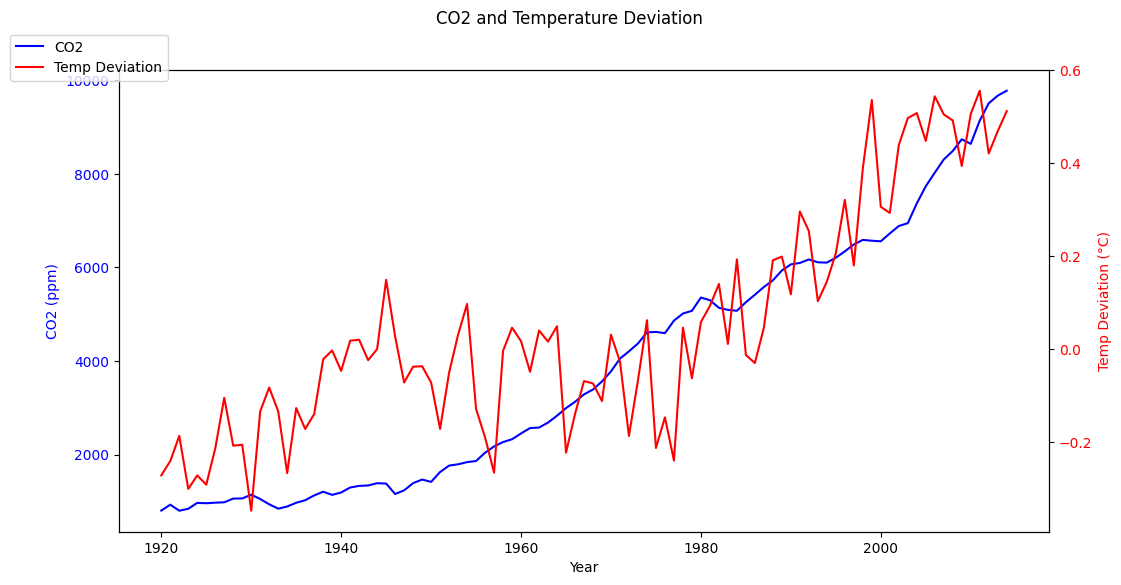

In [6]:
# Load climate data
climate = pd.read_csv("climate.csv")
climate_ts = climate[['CO2', 'Temp']].values
time_index = pd.date_range(start='1919', end='2014', freq='Y')

# Plot CO2 and Temp with separate y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis for CO2
ax1.plot(time_index, climate_ts[:, 0], color='blue', label='CO2')
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 (ppm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Right y-axis for Temp Deviation
ax2 = ax1.twinx()
ax2.plot(time_index, climate_ts[:, 1], color='red', label='Temp Deviation')
ax2.set_ylabel('Temp Deviation (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
fig.suptitle("CO2 and Temperature Deviation")
fig.legend(loc='center', bbox_to_anchor=(0.1,0.9))
plt.show()

In [7]:
# Split into train and test
train = climate['Temp'][:89]  
test = climate['Temp'][89:]   
climate

,Year,CO2,Temp
0,1919,806,-0.272
1,1920,932,-0.241
2,1921,803,-0.187
3,1922,845,-0.301
4,1923,970,-0.272
...,...,...,...
90,2009,8641,0.506
91,2010,9137,0.556
92,2011,9508,0.421
93,2012,9671,0.469


In [8]:
# ETS Model
ets_model = ETSModel(train, error="add", trend="add", seasonal=None)
ets_fit = ets_model.fit()
print(ets_fit.summary())

                                 ETS Results                                  
Dep. Variable:                   Temp   No. Observations:                   89
Model:                       ETS(AAN)   Log Likelihood                  78.607
Date:                Fri, 14 Mar 2025   AIC                           -147.213
Time:                        16:27:01   BIC                           -134.770
Sample:                             0   HQIC                          -142.198
                                 - 89   Scale                            0.010
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.3175      0.073      4.376      0.000       0.175       0.460
smoothing_trend  3.175e-05        nan        nan        nan         nan         nan
initial_level      -0.2754      

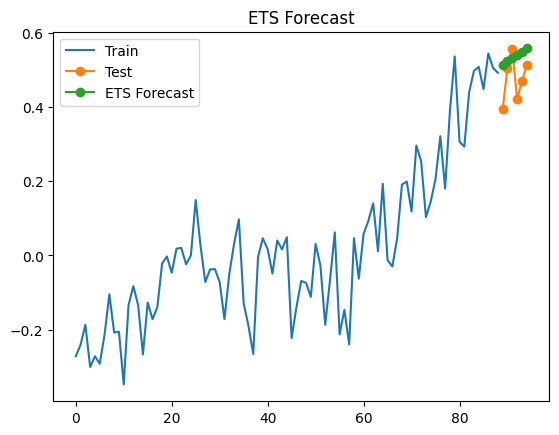

ETS RMSE: 0.07936004497405913


In [9]:
ets_forecast = ets_fit.forecast(steps=6)
plt.plot(train, label='Train')
plt.plot(test.index, test, label='Test', marker='o')
plt.plot(test.index, ets_forecast, label='ETS Forecast', marker='o')
plt.legend()
plt.title('ETS Forecast')
plt.show()

print("ETS RMSE:", np.sqrt(mean_squared_error(test, ets_forecast)))

C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-146.195, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-127.771, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-133.871, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-147.845, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-129.266, Time=0.02 sec


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-148.184, Time=0.20 sec


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-148.201, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-140.214, Time=0.09 sec


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-149.398, Time=0.39 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-150.251, Time=0.19 sec


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-148.597, Time=0.27 sec


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-147.242, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-148.800, Time=0.10 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 2.761 seconds


C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


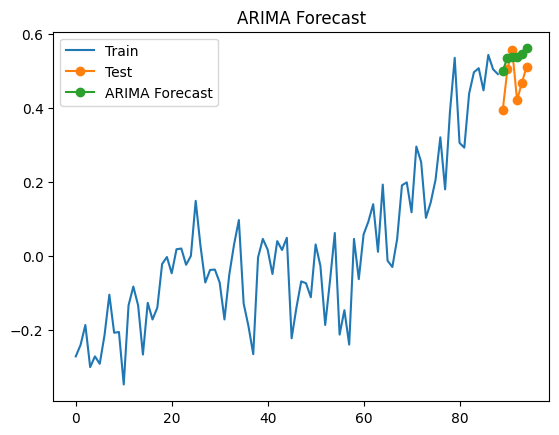

ARIMA RMSE: 0.0763948238002761


In [10]:
# ARIMA Model
arima_model = auto_arima(train, seasonal=False, trace=True)
arima_forecast = arima_model.predict(n_periods=6)
plt.plot(train, label='Train')
plt.plot(test.index, test, label='Test', marker='o')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', marker='o')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

print("ARIMA RMSE:", np.sqrt(mean_squared_error(test, arima_forecast)))

### Granger Causality

Test if CO2 Granger-causes Temp, reporting p-values for each lag up to max_lag.  

The plot provides an indication of where you should cut the data for the analysis.

In [32]:
# Prepare data for Granger Causality
# Prepare data for VAR and Granger Causality
# Prepare data for VAR and Granger Causality (from 1963, index 44)
X_granger = climate[['CO2']].values[44:]  # 1963-2013, 51 rows
Y_granger = climate['Temp'].values[44:]
data_granger = pd.DataFrame(np.column_stack([Y_granger, X_granger]), columns=['Temp', 'CO2'], index=time_index[44:])
data_granger.head()

,Temp,CO2
1963-12-31,0.049,2833.0
1964-12-31,-0.223,2995.0
1965-12-31,-0.140,3130.0
1966-12-31,-0.069,3288.0
1967-12-31,-0.074,3393.0


In [33]:
# Fit VAR model to find optimal lag

diff = data_granger.diff().dropna()
var_model = VAR(diff)
lag_results = var_model.select_order(maxlags=6)  # Check up to 10 lags
optimal_lag = lag_results.aic  # Lag with minimum AIC
print(f"Optimal lag order (AIC): {optimal_lag}")

Optimal lag order (AIC): 5


In [34]:
diff.head()

,Temp,CO2
1964-12-31,-0.272,162.0
1965-12-31,0.083,135.0
1966-12-31,0.071,158.0
1967-12-31,-0.005,105.0
1968-12-31,-0.038,173.0


In [35]:
# Run Granger Causality test (CO2 -> Temp)
print("Granger Causality Test (CO2 -> Temp):")
granger_results = grangercausalitytests(diff, maxlag=5, verbose=True)

Granger Causality Test (CO2 -> Temp):

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0013  , p=0.9718  , df_denom=46, df_num=1
ssr based chi2 test:   chi2=0.0013  , p=0.9707  , df=1
likelihood ratio test: chi2=0.0013  , p=0.9707  , df=1
parameter F test:         F=0.0013  , p=0.9718  , df_denom=46, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0833  , p=0.9202  , df_denom=43, df_num=2
ssr based chi2 test:   chi2=0.1860  , p=0.9112  , df=2
likelihood ratio test: chi2=0.1857  , p=0.9113  , df=2
parameter F test:         F=0.0833  , p=0.9202  , df_denom=43, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2516  , p=0.8597  , df_denom=40, df_num=3
ssr based chi2 test:   chi2=0.8868  , p=0.8286  , df=3
likelihood ratio test: chi2=0.8785  , p=0.8306  , df=3
parameter F test:         F=0.2516  , p=0.8597  , df_denom=40, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test

C:\Users\datam\anaconda3\envs\p37env\lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


## Interpretation

The null hypothesis is: "CO2 does not Granger-cause Temp", meaning past values of CO2 (up to 5 lags) do not improve predictions of Temp beyond Temp’s own past values. The four test statistics assess this over 5 lags:

Reconciling the Tests
F-tests (SSR and Parameter): p = 0.0694, no Granger causality at 5%, but suggestive at 10%.
Chi-squared (SSR): p = 0.0102, Granger causality at 5%.
Likelihood Ratio: p = 0.0237, Granger causality at 5%.
Why the discrepancy?

Test sensitivity: The chi-squared and likelihood ratio tests are often more powerful in small samples or when effects are spread across lags, while the F-test can be conservative with limited degrees of freedom (34 here).
Sample size: 51 observations with 5 lags (10 parameters + intercept) uses about 20% of the data, which is better than 10 lags (40%), but still constrains power. The chi-squared tests seem to detect a signal the F-test misses narrowly.

## Results and Discussion

### AR1/MA1 Simulations
- Confirmed AR(1) and MA(1) properties via ACF/PACF plots.

### Climate Data Analysis
- **ARIMA/ETS**: Forecast Temp (full series) with RMSE for accuracy.
- **Granger**: 5 lags from 1963-2013; chi2 (p=0.0102) and LR (p=0.0237) suggest CO2 Granger-causes Temp.

**Limitations**: Small sample size (51 rows for Granger, 95 for others); assumes stationarity for VAR/Granger

### LSTM Forecasting

Forecast Temperature using LSTM.  

### Load and Explore Data

Load the Delhi climate dataset and inspect its structure.

In [3]:
# Load data
data = pd.read_csv("DailyDelhiClimateTrain.csv", parse_dates=['date'], index_col='date')
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB
None

Missing Values:
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


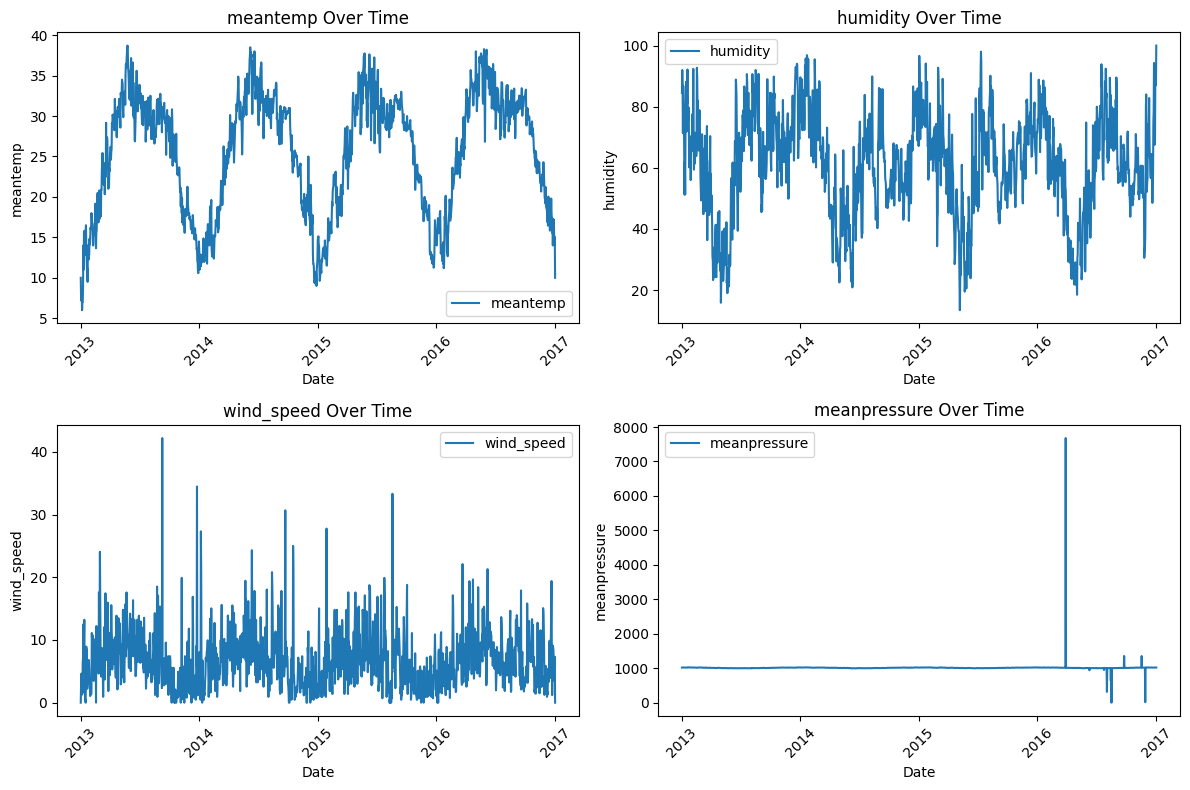

In [16]:
# Features and target
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
target = 'meantemp'

# Plot all features
## Need to fix the x-axis of these plots
# Plot all features with improved x-axis
# Plot all features with improved x-axis
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'{feature} Over Time')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    # Improve x-axis readability
    plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Yearly ticks
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as YYYY
plt.tight_layout()
plt.show()
# Note that mean pressure shows outliers and would require further data understanding

### Preprocess Data

Scale the data and create sequences for LSTM input.

In [5]:
# Scale all features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[features])
data_scaled_df = pd.DataFrame(data_scaled, columns=features, index=data.index)

# Function to create sequences
def create_sequences(data, seq_length, target_idx=0):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])  # Sequence of all features
        y.append(data[i + seq_length, target_idx])  # Next meantemp value
    return np.array(X), np.array(y)

# Parameters
seq_length = 30  # 30-day sequences
train_size = int(len(data) * 0.8)  # 80% train, 20% test
target_idx = 0  # Index of 'meantemp' in features

# Create sequences
X, y = create_sequences(data_scaled, seq_length, target_idx)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Verify shapes
print(f"X_train shape: {X_train.shape}")  # (samples, seq_length, n_features)
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1169, 30, 4)
y_train shape: (1169,)
X_test shape: (263, 30, 4)
y_test shape: (263,)


### Build and Train LSTM Model

Design an LSTM model to forecast temperature.

In [17]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, len(features)), return_sequences=True),
    LSTM(50, activation='relu'),
    Dense(1)  # Predict meantemp
])
model.compile(optimizer='adam', loss='mae')

In [18]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
33/33 [==============================] - 3s 50ms/step - loss: 0.2843 - val_loss: 0.1143
Epoch 2/50
33/33 [==============================] - 1s 41ms/step - loss: 0.0778 - val_loss: 0.0753
Epoch 3/50
33/33 [==============================] - 1s 44ms/step - loss: 0.0602 - val_loss: 0.0632
Epoch 4/50
33/33 [==============================] - 1s 44ms/step - loss: 0.0590 - val_loss: 0.0691
Epoch 5/50
33/33 [==============================] - 2s 46ms/step - loss: 0.0565 - val_loss: 0.0668
Epoch 6/50
33/33 [==============================] - 1s 45ms/step - loss: 0.0555 - val_loss: 0.0632
Epoch 7/50
33/33 [==============================] - 1s 44ms/step - loss: 0.0579 - val_loss: 0.0580
Epoch 8/50
33/33 [==============================] - 1s 44ms/step - loss: 0.0616 - val_loss: 0.0681
Epoch 9/50
33/33 [==============================] - 1s 43ms/step - loss: 0.0548 - val_loss: 0.0638
Epoch 10/50
33/33 [==============================] - 1s 44ms/step - loss: 0.0540 - val_loss: 0.0619
Epoch 11/

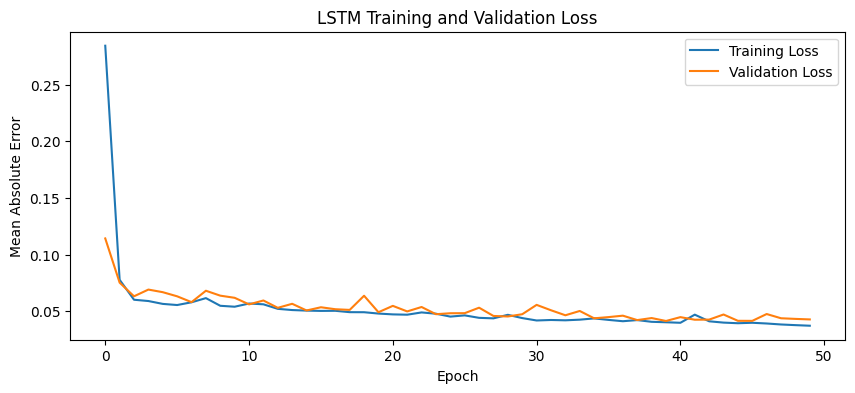

In [19]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

### Forecast and Evaluate

Generate forecasts and evaluate performance on the test set.

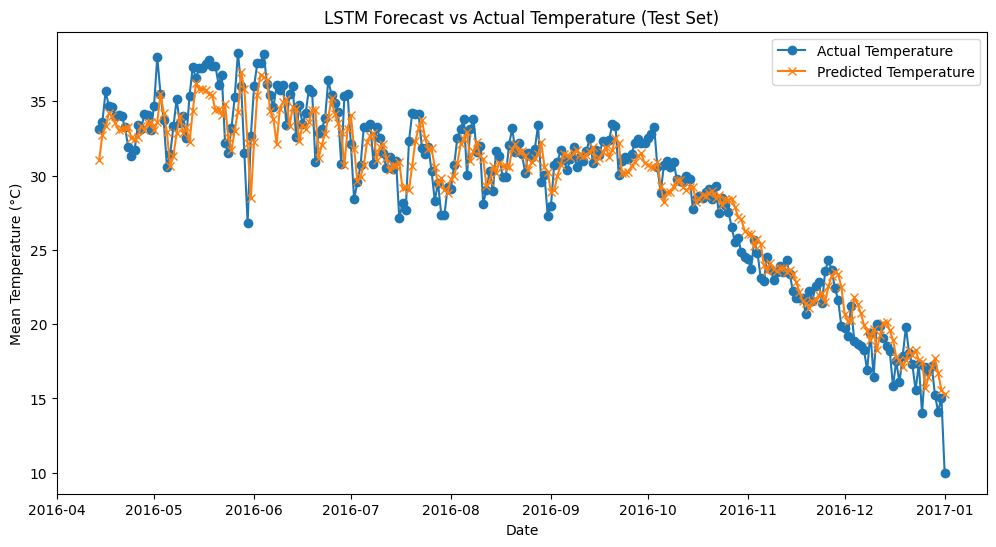

In [20]:
# Forecast on test set
y_pred = model.predict(X_test, verbose=0)

# Inverse transform predictions and actual values (only meantemp)
temp_scaler = MinMaxScaler()
temp_scaler.min_, temp_scaler.scale_ = scaler.min_[0], scaler.scale_[0]  # meantemp scaling
y_test_unscaled = temp_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_unscaled = temp_scaler.inverse_transform(y_pred)

# Plot results
test_dates = data.index[train_size + seq_length:]
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_unscaled, label='Actual Temperature', marker='o')
plt.plot(test_dates, y_pred_unscaled, label='Predicted Temperature', marker='x')
plt.title('LSTM Forecast vs Actual Temperature (Test Set)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

In [21]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled))
print(f"Test MAE: {rmse:.2f} °C")

Test MAE: 1.71 °C


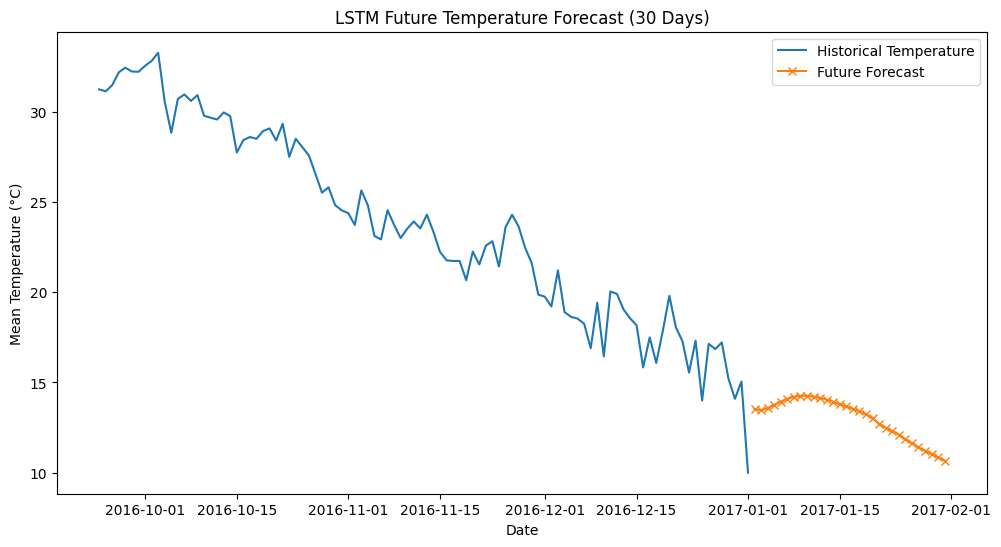

In [22]:
# Forecast future (e.g., 30 days beyond the dataset)
last_sequence = data_scaled[-seq_length:].copy()
future_forecast = []
for _ in range(30):
    pred = model.predict(last_sequence.reshape(1, seq_length, len(features)), verbose=0)
    future_forecast.append(pred[0, 0])
    # Shift sequence; assume other features hold at last value, update meantemp
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1] = [pred[0, 0], last_sequence[-2, 1], last_sequence[-2, 2], last_sequence[-2, 3]]

# Inverse transform future forecast
future_forecast_unscaled = temp_scaler.inverse_transform(np.array(future_forecast).reshape(-1, 1))

# Plot future forecast
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.figure(figsize=(12, 6))
plt.plot(data.index[-100:], data['meantemp'][-100:], label='Historical Temperature')
plt.plot(future_dates, future_forecast_unscaled, label='Future Forecast', marker='x')
plt.title('LSTM Future Temperature Forecast (30 Days)')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()

## Results and Discussion

### Dataset
- **Daily Delhi Climate**: 1,576 days (2013-2017) with temperature, humidity, wind speed, and pressure.

### LSTM Performance
- **Training**: 50 epochs with validation split to monitor overfitting.
- **Test RMSE**: Measures forecast accuracy on the last 20% of data.
- **Future Forecast**: 30-day prediction assuming static humidity, wind speed, and pressure.

**Limitations**: Assumes static non-target features for future forecasts; daily data may have noise or seasonality not fully captured by 30-day sequences.